In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [2]:
plt.style.use("Solarize_Light2")

In [3]:
file_path = r"C:\Users\muski\Desktop\NewProject\Segementation\bank_transactions.csv"

df = pd.read_csv(file_path)
df.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
122118,T122119,C4235534,05/03/1990,M,KOLKATA,61200.27,06/08/2016,210441,601.00
1046082,T1046083,C4710991,10/07/1969,M,LUCKNOW,9428.87,18/09/2016,121245,4498.45
848956,T848957,C6820536,11/01/1982,F,GURGAON,15075.17,09/09/2016,190757,4780.00


In [4]:
hour = [int(datetime.fromtimestamp(i).strftime("%H")) for i in df.TransactionTime.values]

# Categorizing Time Periods
time = []

# Iterate over each extracted hour
for i in hour:
    # Morning: hours between 0 (inclusive) and 12 (exclusive)
    if i >= 0 and i < 12:
        time.append("Morning")
    # Afternoon: hours between 12 (inclusive) and 17 (inclusive)
    elif i >= 12 and i <= 17:
        time.append("Afternoon")
    # Evening: hours between 17 (exclusive) and 19 (inclusive)
    elif i > 17 and i <= 19:
        time.append("Evening")
    # Night: hours greater than 19
    elif i > 19:
        time.append("Night")

In [5]:
df["TransactionHourOfDay"] = hour
df["TransactionTimeOfDay"] = time

In [6]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

## Split Transaction date in to day, month
df['Day'] = df['TransactionDate'].dt.dayofweek
df['Day'] =df['Day'] + 1
df['Month'] = df['TransactionDate'].dt.month

In [7]:
#drop na in 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'

drop_column = ['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']
df.dropna(subset=drop_column, inplace=True)

In [8]:
# Age
df['Age'] = ((datetime.today() - df['CustomerDOB']).dt.total_seconds() / (365.25 * 24 * 3600)).astype(int)


In [9]:
# Drop DOB
df.drop(columns=['CustomerDOB'], inplace=True)

In [10]:
# Remove the Gender = T
df.drop(df[df['CustGender'] == 'T'].index, inplace=True)

In [11]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,TransactionID,object,1041613,0
1,CustomerID,object,879357,0
2,CustGender,object,2,0
3,CustLocation,object,9275,0
4,CustAccountBalance,float64,160722,0
5,TransactionDate,datetime64[ns],55,0
6,TransactionTime,int64,81855,0
7,TransactionAmount (INR),float64,92391,0
8,TransactionHourOfDay,int64,24,0
9,TransactionTimeOfDay,object,4,0


In [12]:
df.sample(3)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionHourOfDay,TransactionTimeOfDay,Day,Month,Age
38540,T38541,C8815124,F,KANPUR,6066.84,2016-09-27,220907,156.0,13,Afternoon,2,9,32
20877,T20878,C2221980,M,CHENNAI,36024.18,2016-09-23,192517,2600.0,5,Morning,5,9,52
171374,T171375,C2031240,F,FEROZEPUR,8703.92,2016-08-04,173135,1698.0,0,Morning,4,8,31


In [13]:
df.describe()

,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionHourOfDay,Day,Month,Age
count,1.041613e+06,1041613,1.041613e+06,1.041613e+06,1.041613e+06,1.041613e+06,1.041613e+06,1.041613e+06
mean,1.149987e+05,2016-08-25 04:47:01.222853888,1.571221e+05,1.566066e+03,1.043121e+01,4.044557e+00,8.380193e+00,4.796709e+01
min,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00,-6.000000e+00
25%,4.728140e+03,2016-08-12 00:00:00,1.240410e+05,1.600000e+02,5.000000e+00,2.000000e+00,8.000000e+00,3.200000e+01
50%,1.676852e+04,2016-08-25 00:00:00,1.642470e+05,4.575000e+02,1.000000e+01,4.000000e+00,8.000000e+00,3.600000e+01
75%,5.742885e+04,2016-09-06 00:00:00,2.000220e+05,1.200000e+03,1.500000e+01,6.000000e+00,9.000000e+00,4.300000e+01
max,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06,2.300000e+01,7.000000e+00,1.000000e+01,2.230000e+02
std,8.467613e+05,NaN,5.126354e+04,6.561398e+03,6.503001e+00,2.047756e+00,4.925884e-01,4.269038e+01


## Gender counts and Group by Transactions dates

In [14]:
# Gender counts
Gender_counts = df.groupby('CustGender').size()
# Group Transaction by Trasanction dates
transaction_counts = df.groupby(['TransactionDate', 'CustGender']).size().unstack().fillna(0)

# Convert the index (dates) to datetime format for better plotting
transaction_counts.index = pd.to_datetime(transaction_counts.index)

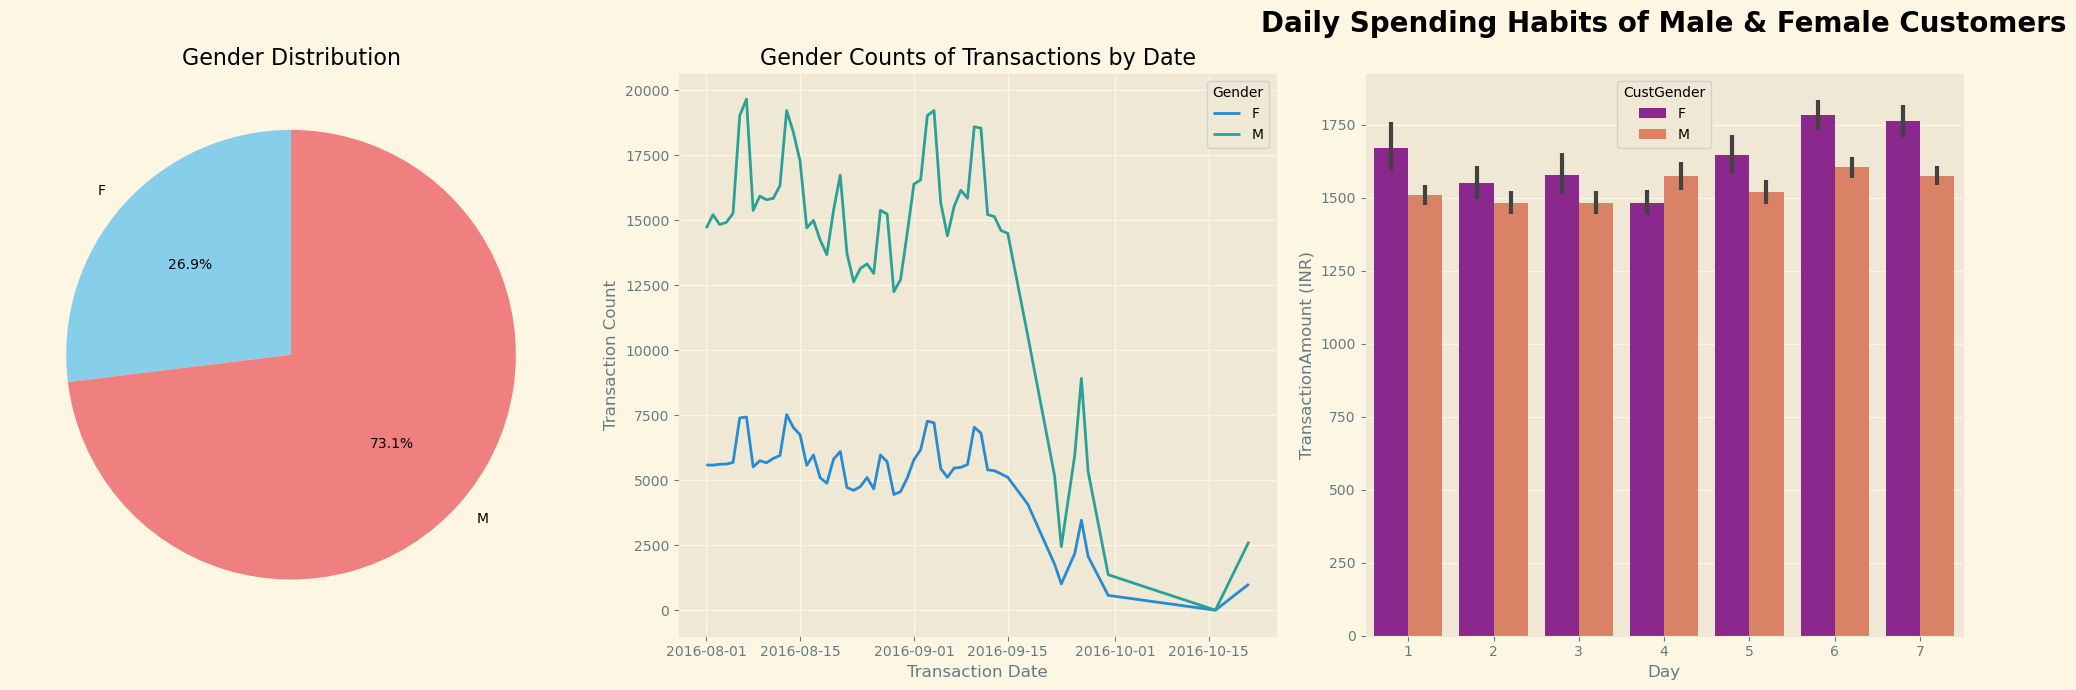

In [15]:
# Create a subplot with three plots on the same line
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# Adjust the height space between subplots
plt.subplots_adjust(wspace=0.4)

# Plot Gender counts as a pie chart
ax1.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
ax1.set_title('Gender Distribution')

# Plot Transaction counts as a line chart
for gender in transaction_counts.columns:
    ax2.plot(transaction_counts.index, transaction_counts[gender], label=gender)

ax2.set_title('Gender Counts of Transactions by Date')
ax2.set_xlabel('Transaction Date')
ax2.set_ylabel('Transaction Count')
ax2.legend(title='Gender', loc='upper right')
ax2.grid(True)

# Plot Weekday-Wise Comparison of Spending Habits of Male & Female Customers
sns.barplot(data=df, x='Day', y='TransactionAmount (INR)', palette='plasma', hue='CustGender', ax=ax3)
ax3.set_title('Daily Spending Habits of Male & Female Customers', fontsize=20, fontweight='bold', color='black', pad=30)

plt.tight_layout()
plt.show()

C:\Users\muski\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


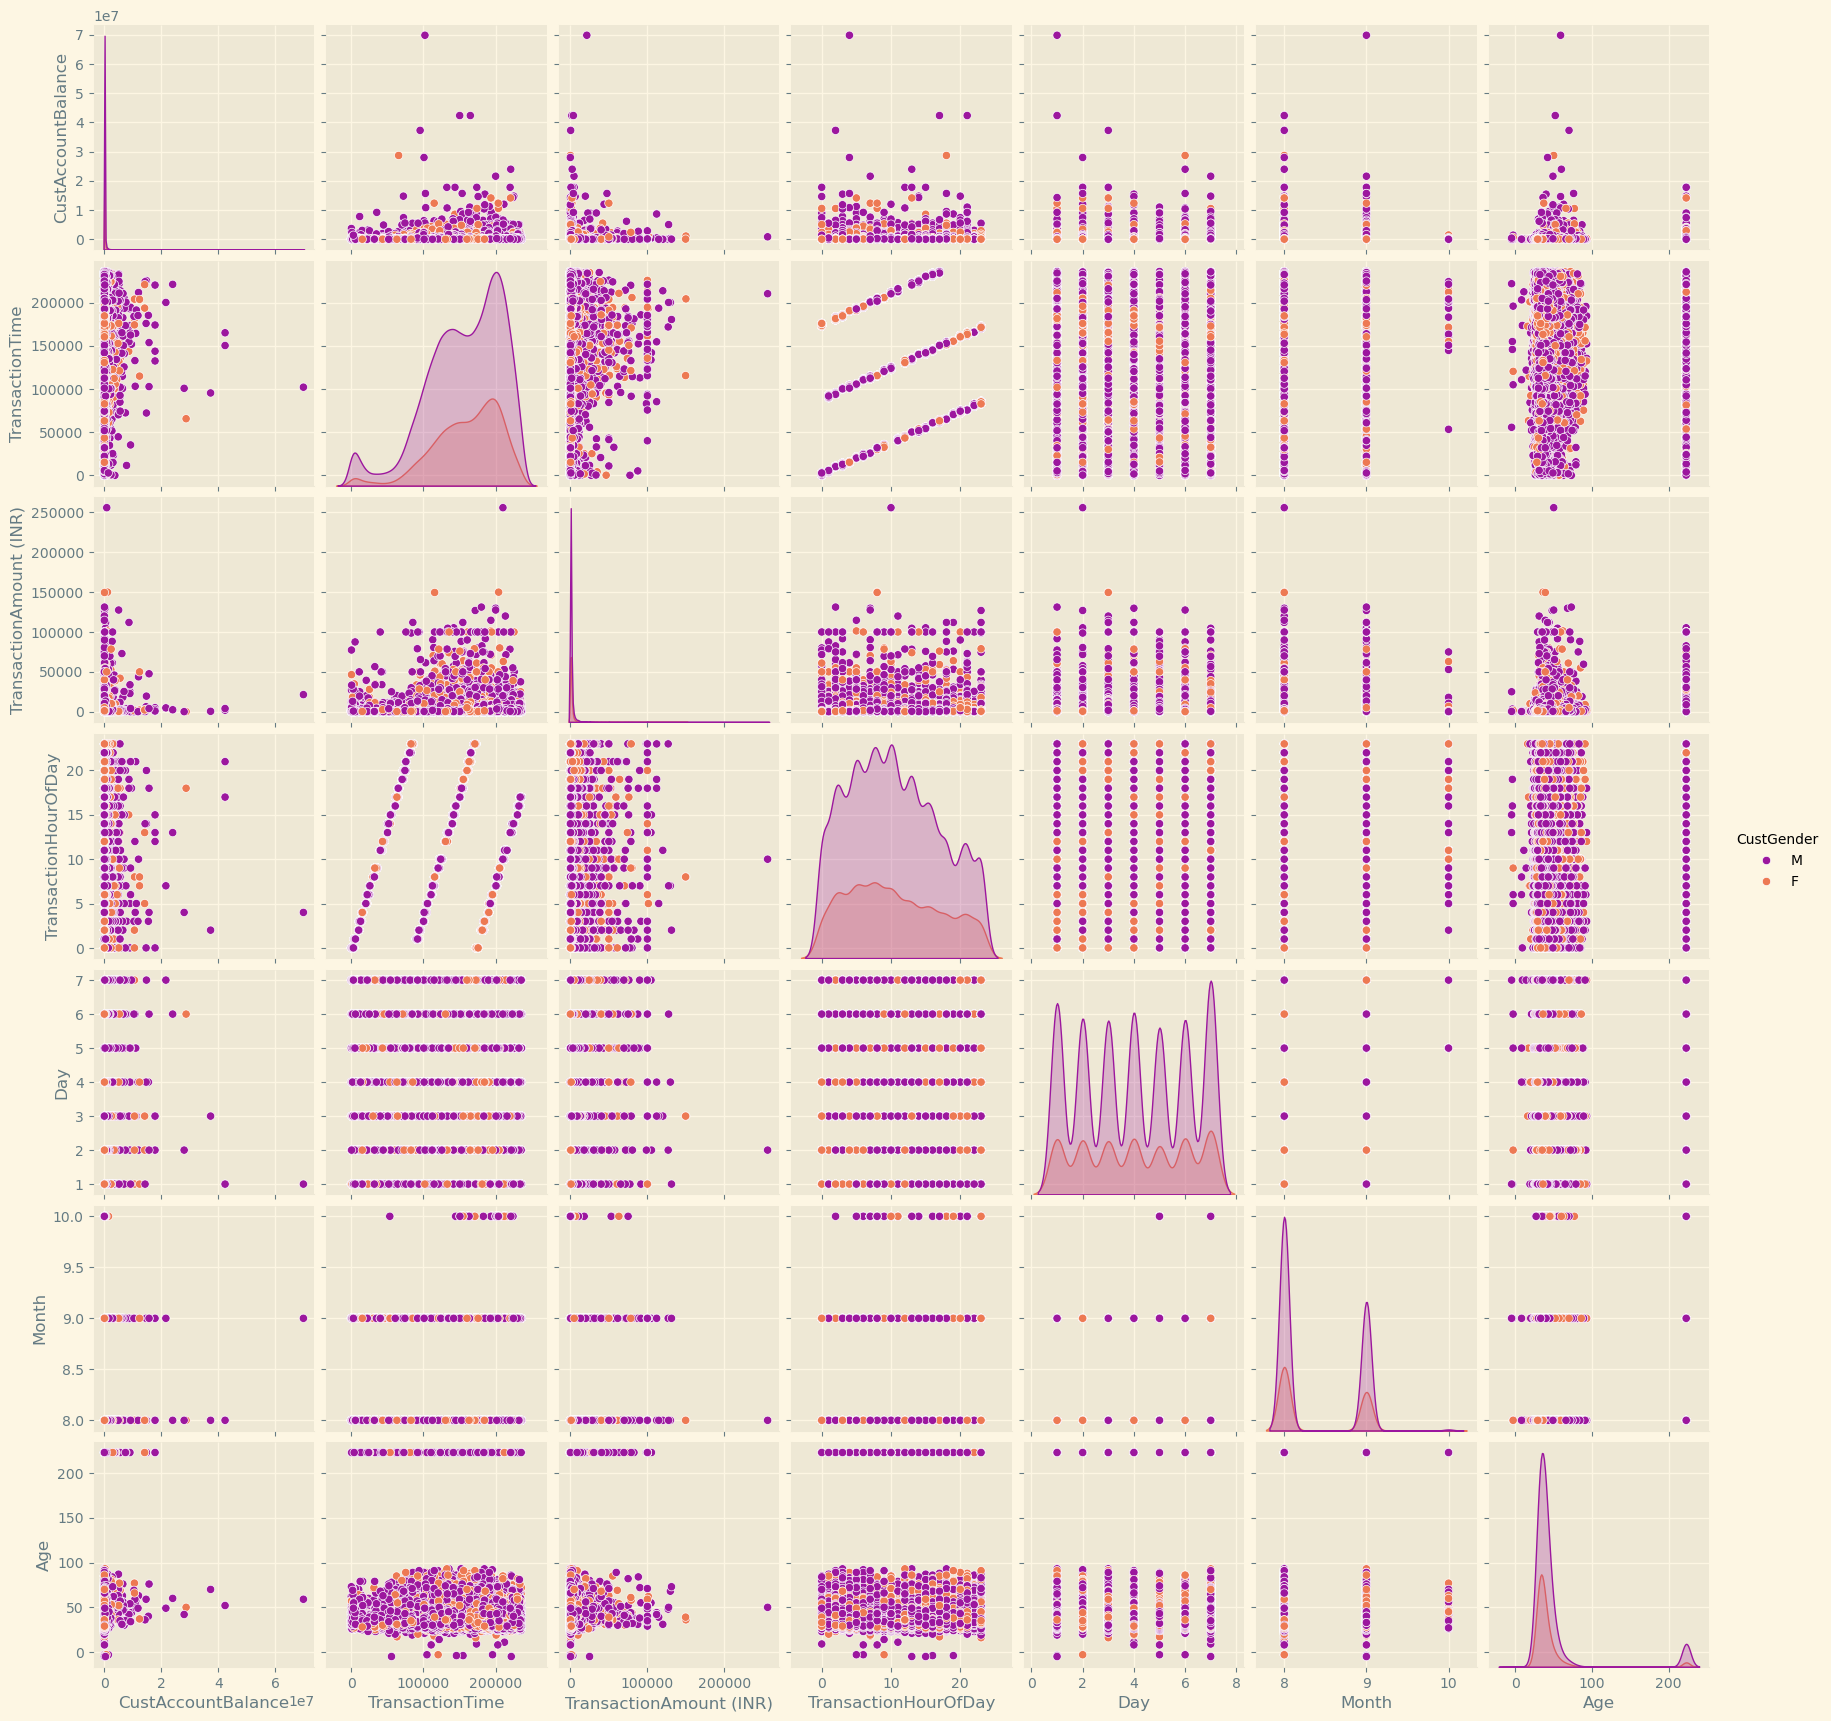

In [16]:
sns.pairplot(df.sample(n=50000),hue='CustGender',palette='plasma')

## Number of transactions for each hour of the day and time of the day

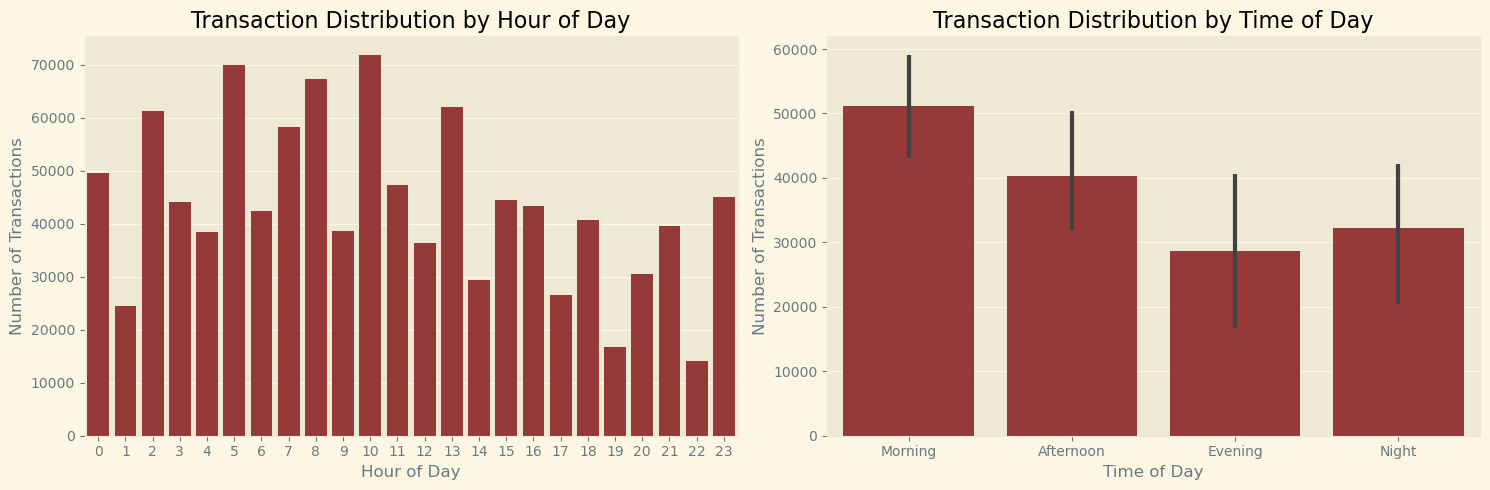

In [17]:
# Count the number of transactions for each hour of the day and time of the day
hour_time_counts = df.groupby(['TransactionHourOfDay', 'TransactionTimeOfDay']).size().reset_index(name='TransactionCount')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for TransactionHourOfDay
sns.barplot(x='TransactionHourOfDay', y='TransactionCount', data=hour_time_counts, ax=axes[0], color='brown')
axes[0].set_title('Transaction Distribution by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Transactions')

# Bar plot for TransactionTimeOfDay
sns.barplot(x='TransactionTimeOfDay', y='TransactionCount', data=hour_time_counts, ax=axes[1], color='brown')
axes[1].set_title('Transaction Distribution by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Number of Transactions')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

## Age Groups by Transaction dates and Transaction Amounts for each Month


In [18]:
# Group Transaction by Trasanction dates
age_counts = df.groupby(['Age', 'TransactionDate']).size().unstack().fillna(0)

# Select the top 4 values based on 'CustAccountBalance' and drop duplicate ages
top_4_values_unique_age = df.loc[df.groupby('Age')['CustAccountBalance'].idxmax()].nlargest(4, 'CustAccountBalance')

# Select a few age groups for better readability
selected_age_groups = age_counts.sum(axis=1).nlargest(5, keep='all').index
selected_age_groups

Index([33, 32, 34, 31, 35], dtype='int32', name='Age')

In [19]:
top_4_values_unique_age

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionHourOfDay,TransactionTimeOfDay,Day,Month,Age
40982,T40983,C2916865,M,SHILLONG,1.150355e+08,2016-09-27,224912,6959.0,14,Afternoon,2,9,56
488301,T488302,C2014414,F,GURGAON,8.224463e+07,2016-08-20,111032,20478.0,6,Morning,6,8,92
789795,T789796,C6826860,M,TIRUPUR,6.979933e+07,2016-09-05,102037,100000.0,4,Morning,1,9,59
749353,T749354,C8217728,M,MUMBAI,6.138221e+07,2016-09-02,233715,724122.0,16,Afternoon,5,9,54


In [ ]:
# Assuming 'age_counts' is your DataFrame with age group counts
plt.figure(figsize=(18, 6))

# Scatter plot on the left axis
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Month', y='TransactionAmount (INR)', hue='Month', palette='plasma')
plt.title('Scatter Plot of Transaction Amounts Over Months')

# Horizontal bar chart for selected age groups in the middle axis
plt.subplot(1, 3, 2)
for age_group in selected_age_groups:
    plt.barh(age_counts.columns, age_counts.loc[age_group], label=f'Age {age_group}', alpha=1)

plt.title('Top 5 Transactions Over Time for Selected Age Groups')
plt.xlabel('Transaction Count')
plt.ylabel('Transaction Date')
plt.legend(title='Age', loc='upper right')

# Bar plot for top 4 values on the right axis
plt.subplot(1, 3, 3)
sns.barplot(data=top_4_values_unique_age, x='Age', y='CustAccountBalance', hue='Age', palette='plasma')
plt.title('Top 4: Age with highest CustAccountBalance')

plt.tight_layout()
plt.show()


## Top Customers locations and Averages Transactions volumes for each city.

In [ ]:
# Calculate top customer locations
locations = df['CustLocation'].value_counts().nlargest(10)

# Calculate transaction volumes for each city
avg_transaction = df.groupby('CustLocation')['TransactionAmount (INR)'].mean()

city_transaction_volumes = avg_transaction.nlargest(10)

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot top customer locations
axes[0].barh(locations.index, locations.values, color='brown')  # Use barh for horizontal bar chart
axes[0].set_title('Top Customer Locations')
axes[0].set_xlabel('Transaction Amount (INR)')
axes[0].set_ylabel('Location')  # Swap x and y labels
axes[0].tick_params(axis='y', rotation=0)  # Adjust y-axis labels as needed

# Plot Average transaction volumes for each location 
axes[1].barh(city_transaction_volumes.index, city_transaction_volumes.values, color='brown')  # Use barh for horizontal bar chart
axes[1].set_title('Transaction Amounts for Each Location')
axes[1].set_xlabel('Transaction Amount (INR)')
axes[1].set_ylabel('Location')  # Swap x and y labels
axes[1].tick_params(axis='y', rotation=0)  # Adjust y-axis labels as needed

plt.tight_layout()
plt.show()

## Boxplots for columns with numerical data types. 

In [ ]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)
num_col.sample(3)

In [ ]:
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,3,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 2.0)

## RFM

In [ ]:
max_date = df['TransactionDate'].max()
max_date

In [ ]:
# Create RFM 
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (max_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'  # Monetary calculation
})

rfm.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

In [ ]:
rfm.describe()

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency
sns.histplot(rfm['Recency'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (Days)')

# Plot Frequency
sns.histplot(rfm['Frequency'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency')

# Plot Monetary
sns.histplot(rfm['Monetary'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary (INR)')

plt.tight_layout()
plt.show()

## Data Modelling

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import random
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer 
import plotly.graph_objects as go


In [ ]:
plt.style.use("Solarize_Light2")

In [ ]:
df1 = df.copy()
df1.sample(2)

In [ ]:
le = preprocessing.LabelEncoder()
  
df1['CustGender']= le.fit_transform(df1['CustGender'])
df1['CustLocation']= le.fit_transform(df1['CustLocation'])
df1.sample(2)

In [ ]:
df1 = df1.drop(df1[df1['TransactionAmount (INR)'] == 0].index,axis = 0)
df1[df1['TransactionAmount (INR)'] == 0].count()

In [ ]:
df1 = df1.drop_duplicates(subset='CustomerID')
df1 = pd.merge(df1, rfm, on='CustomerID', how='outer')

# drop columns
drop = ['CustGender', 'TransactionID', 'CustomerID', 'TransactionDate', 'TransactionTime', 'TransactionHourOfDay', 'TransactionTimeOfDay', 'Day', 'Month']
df1 = df1.drop(columns=drop)

In [ ]:
clean = ['CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)', 'Age']

# Fill missing values with the mean in specified columns
df1[clean] = df1[clean].fillna(df1[clean].mean())

In [ ]:
## Show detailes data set
def check(df1):
    l=[]
    columns=df1.columns
    for col in columns:
        dtypes=df1[col].dtypes
        nunique=df1[col].nunique()
        sum_null=df1[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df1)

In [ ]:
df1.describe()

## Correlation 

In [ ]:
corr = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## The k-means clustering

The k-means clustering is a method of vector quantization, originally from signal processing, that
The Elbow method is a graphical representation of finding the optimal 'K' in a K-means cluster

In [ ]:
df2 = df1.copy()
df2.sample(4)

In [ ]:
columns =['CustLocation','CustAccountBalance','TransactionAmount (INR)','Age', 'Recency', 'Frequency','Monetary']
s = StandardScaler()
df2 = s.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=columns)
df2.tail()

In [ ]:
df2 =df2.sample(n=120000,random_state=42).reset_index(drop=True)
df2.tail()

In [ ]:
# Extract features from the DataFrame
X = df2[['Age', 'TransactionAmount (INR)']].values
# Remove the target variable 'TransactionAmount (INR)' from Y
Y = df2[['CustLocation', 'TransactionAmount (INR)']].values

# Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42, n_init=10)  # or n_init='auto'
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()

# Perform elbow method for clustering based on 'Age'
optimal_clusters_elbow_x = perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')

# Perform elbow method for clustering based on 'CustLocation'
optimal_clusters_elbow_y = perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')

In [ ]:
# Print the optimal number of clusters
print("Optimal Clusters for Customer Age (Elbow):", optimal_clusters_elbow_x)
print("Optimal Clusters for Customer Location (Elbow):", optimal_clusters_elbow_y)

In [ ]:
# Function to perform KMeans clustering and return the cluster labels and centroids
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=5)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=6)

In [ ]:
print("x_cluster_labels",x_cluster_labels)
print("x_cluster_centers",x_cluster_centers)
print("y_cluster_labels",y_cluster_labels)
print("y_cluster_centers",y_cluster_centers)

In [ ]:
# Add cluster labels to the DataFrame
df2['cluster_age'] = x_cluster_labels
df2['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df2['cen_xx'] = df2.cluster_age.map({i: x_cluster_centers[i][0] for i in range(5)})
df2['cen_xy'] = df2.cluster_age.map({i: x_cluster_centers[i][1] for i in range(5)})
df2['cen_yx'] = df2.cluster_location.map({i: y_cluster_centers[i][0] for i in range(6)})
df2['cen_yy'] = df2.cluster_location.map({i: y_cluster_centers[i][1] for i in range(6)})

In [ ]:
df2.tail(3)

In [ ]:
# Define colors for each cluster
colors_X = ['purple', 'pink', 'magenta', 'blue', 'brown']
colors_Y = ['purple', 'pink', 'magenta', 'blue', 'brown', 'red','cyan']


# Add cluster colors to the DataFrame
df2['color_age_km'] = df2.cluster_age.map({i: colors_X[i] for i in range(5)})
df2['color_location_km'] = df2.cluster_location.map({i: colors_Y[i] for i in range(6)})

In [ ]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df2['Age'], df2['TransactionAmount (INR)'], c=df2.color_age_km)
plt.scatter(df2['cen_xx'], df2['cen_xy'], marker='d', s=250, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('Age')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=df2.color_location_km)
plt.scatter(df2['cen_yx'], df2['cen_yy'], marker='d', s=250, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

## Silhouette Coefficient

The Silhouette Score is a metric used to evaluate the quality of clustering results.
It measures how well-separated the clusters are and provides a numerical value between -1 and 1.

A score close to 1 indicates that the data point is well-clustered and far away from other clusters, representing good separation.
A score close to 0 suggests overlapping clusters or data points on the decision boundary between clusters.
A negative score indicates that the data point might have been assigned to the wrong cluster.

In [ ]:
# Function to calculate silhouette score and return labels
def calculate_silhouette_score(X, clusters):
    kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    return cluster_labels, silhouette_avg

# Silhouette Score for cluster_age
labels_age, silhouette_score_age = calculate_silhouette_score(df2[['TransactionAmount (INR)', 'Age']], clusters=5)

# Silhouette Score for cluster_location
labels_location, silhouette_score_location = calculate_silhouette_score(df2[['CustLocation', 'TransactionAmount (INR)']], clusters=6)


In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot for Silhouette Score for cluster_age
axes[0].scatter(df2['Age'], df2['TransactionAmount (INR)'], c=labels_age, cmap='magma')
axes[0].set_title(f'Silhouette Score for cluster_age: {silhouette_score_age:.2f}')

# Subplot for Silhouette Score for cluster_location
axes[1].scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=labels_location, cmap='magma')
axes[1].set_title(f'Silhouette Score for cluster_location: {silhouette_score_location:.2f}')

plt.show()

In [ ]:
# Exclude non-numeric columns
exclude_columns_age = ['color_age_km', 'color_location_km']
df3 = df2.drop(exclude_columns_age, axis=1).sample(n=20000, random_state=42).reset_index(drop=True)

# Specify the number of clusters
n_clusters = 5

# Initialize KMeans
kmeans_s = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)

# Create a SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans_s, size=(500, 500))

# Fit the visualizer to the data
visualizer.fit(df3)
visualizer.show();

In [ ]:
# Assuming df2 is your DataFrame
non_numeric_values = df2.select_dtypes(exclude='number')

non_numeric_values.sample(4)

In [ ]:
# Exclude specific columns when calculating cluster averages for 'cluster_age'
exclude_columns_age = ['color_age_km', 'color_location_km']
age_cluster_avg = df2.drop(exclude_columns_age, axis=1).groupby('cluster_age').mean().reset_index()


# Print cluster averages for 'cluster_age'
print("Cluster_Age") 
print(age_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','Age']])


Cluster_Age

* Cluster 0 : Younger customers with low transaction activity and lower account balances. 
* Cluster 1 : Younger customers with above-average account balances and significant  transaction amounts. They are financially active but have lower age and represent a group with potential for future growth.
* Cluster 2 : Older customers engage in moderate financial activity, with account balances and transaction amounts slightly above average
* Cluster 3 : Diverse group of customers exhibits moderate account balances but engages in substantial transaction activity.
* Cluster 4 : Younger customers who are financially stable, with moderate account balances and substantial transaction amounts. They represent a group with consistent financial activity.

In [ ]:
# Exclude specific columns when calculating cluster averages for 'cluster_location'
exclude_columns_location = ['color_age_km','color_location_km', ]
location_cluster_avg = df2.drop(exclude_columns_location, axis=1).groupby('cluster_location').mean().reset_index()


# Print cluster averages for 'cluster_location'
print("Cluster_Location") 
print(location_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','Age']])

Cluster_Location

* Cluster 0 : Localised group of customers from specific location with  with lower account balances and transaction amounts.
* Cluster 1 : General customer group with lower account balances and transaction amounts. Moderate financial activity.
* Cluster 2 : Older Customers with unique location that make substantial transactions and maintain higher account balances.
* Cluster 3 : Diverse group from specific locations who maintain higher account balances and make moderate transactions.
* Cluster 4 : Younger customers from specific locations making significant transactions.
* Cluster 5 : Younger Customers from various locations with lower account balances and transaction amounts.

In [ ]:
# Count the number of customers in each 'cluster_age_km' and 'cluster_location_km'
age_cluster_counts = df2['cluster_age'].value_counts().reset_index()
age_cluster_counts.columns = ['Cluster', 'Count']

location_cluster_counts = df2['cluster_location'].value_counts().reset_index()
location_cluster_counts.columns = ['Cluster', 'Count']

# Create subplots on the same line
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'cluster_age_km'
sns.barplot(x='Cluster', y='Count', hue='Cluster', data=age_cluster_counts, palette='plasma', ax=axes[0], dodge=False)
axes[0].set_title('Customer Distribution across Age Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Number of Customers')
axes[0].legend().set_visible(False)

# Plot for 'cluster_location_km'
sns.barplot(x='Cluster', y='Count', hue='Cluster', data=location_cluster_counts, palette='plasma', ax=axes[1], dodge=False)
axes[1].set_title('Customer Distribution across Location Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Customers')
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.show()

* Cluster_Age : Cluster 0, consisting of younger customers with lower activity, might be a potential target for engagement and marketing strategies to increase their transaction involvement. Cluster 2 and 4, representing both the group of young and old customers with moderate account balances and avergae transactions. This requires a tailored approach to meet their varying needs.

* Cluser_Location : Additionally, the bank can focus on serving customers from clusters 5, 1 and 0, which have distinct characteristics in terms of location and transaction behavior.

#### Conclusion

* Diverse Customer Landscape: includes clusters with younger customers having lower transaction activity (Cluster 5) to financially stable customers making sizeable transactions (Cluster 4).
* Youth Engagement Opportunity: Cluster 0, comprising younger customers with lower transaction activity, presents an opportunity for targeted marketing and engagement efforts.
* Location-Specific Strategies: clusters (Clusters 5, 1, and 0) highlight the importance of tailoring strategies to specific regions.
* High-Value Customers: Cluster 4 represents younger customers who engage in substantial transactions and maintain higher account balances.


 To optimize marketing efforts, the bank should focus on customer segments with higher representation, such  as clusters 1 and 2 (age-based clusters) and clusters 5, 1, and 0 (location-based clusters).
 
 
 Targeting these clusters can lead to effective customer engagement and better ROI on marketing campaigns.

## Dendrogram
The Dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering

In [ ]:
numeric_columns = df2.select_dtypes(include=['number'])

plt.figure(figsize=(30, 10))
z = sch.linkage(numeric_columns.iloc[:500, :], 'ward')
sch.dendrogram(z)
plt.show()

## Labels

In [ ]:
# Select only numeric columns
numeric_columns = df2.select_dtypes(include=['number'])

# Specify KMeans parameters
kmeans_params = {"init": "random", "max_iter": 300, "random_state": 42, "n_init": 10}

# Create KMeans instance
kmeans = KMeans(n_clusters=5, **kmeans_params)

# Fit KMeans to the numeric data
labels = kmeans.fit_predict(numeric_columns)

# Add the labels as a new column in the original DataFrame
df2['Label'] = labels

# Display the DataFrame with the new 'Label' column
df2.head()

In [ ]:
label_counts = df2['Label'].value_counts()

# Create a bar plot
plt.bar(label_counts.index, label_counts.values, color='brown')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
cluster_labels = df2['Label']
cluster_centers = df2[['CustLocation', 'CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'Recency', 'Frequency', 'Monetary']]

# Specify attributes and colors
attributes = cluster_centers.columns
colors = px.colors.qualitative.Set1

fig = go.Figure()

# Iterate over clusters and add traces to radar plot
for cluster, color in zip(cluster_labels.unique(), colors):
    cluster_data = cluster_centers[cluster_labels == cluster]
    avg_values = cluster_data.mean()
    
    fig.add_trace(go.Scatterpolar(
        r=avg_values,
        theta=attributes,
        fill='toself',
        fillcolor=color,
        line=dict(color=color),
        opacity=0.7,  # Adjust the opacity here
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Radar Plot of Cluster Centroids"
)
fig.show()
